In [4]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd

In [10]:
rating_data_pd = pd.read_csv(
    "../data/ml-100K/training_set_seed123_ml100k.csv",
    sep=",",
    names=["userID", "itemID", "Rating"],
)
rating_data = rating_data_pd.to_numpy()
rating_data.__len__()
rating_data_pd

,userID,itemID,Rating
0,101,177,4
1,101,289,4
2,101,153,4
3,101,361,4
4,101,321,4
...,...,...,...
79034,724,551,5
79035,724,51,4
79036,724,1014,4
79037,724,98,3


In [12]:

movie = '../data/ml-100K/i_id_mapping_genre.csv'

df_movie = pd.read_csv(movie, sep='\t')
print(f'shape: {df_movie.shape}')


df_movie.columns = ["item_id", "Name","genres","itemID"]
df_movie[:4]
movies = df_movie.sort_values(by="itemID")
unique_genres = [
    "Action",
    "Thriller",
    "Romance",
    "Western",
    "Children's",
    "Mystery",
    "Fantasy",
    "Film-Noir",
    "Documentary",
    "Comedy",
    "Adventure",
    "Sci-Fi",
    "Horror",
    "Crime",
    "Musical",
    "War",
    "Animation",
    "Drama",
]
for genre in unique_genres:
    movies[genre] = 0
    
for index, row in movies.iterrows():
    genres = row["genres"].split("|")
    for genre in genres:
        movies.at[index, genre] = 1
movies

movies = movies.drop(columns=["item_id"])
movies = movies.sort_values(by="itemID")
movies

shape: (1348, 4)


,Name,genres,itemID,Action,Thriller,Romance,Western,Children's,Mystery,Fantasy,...,Documentary,Comedy,Adventure,Sci-Fi,Horror,Crime,Musical,War,Animation,Drama
0,Kolya (1996),Comedy,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,L.A. Confidential (1997),Thriller|Mystery|Film-Noir|Crime,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,Heavyweights (1994),Children's|Comedy,2,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Legends of the Fall (1994),Romance|Western|War|Drama,3,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Jackie Brown (1997),Crime|Drama,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,American Buffalo (1996),Drama,1343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1344,A Chef in Love (1996),Comedy,1344,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1345,Nénette et Boni (1996),Drama,1345,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1346,Hollow Reed (1996),Drama,1346,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
users = pd.read_csv("../data/ml-100k/u_id_mapping_demographic_.csv", sep="\t")
# users
users = users.sort_values(by="userID")
users = users.drop(columns=users.columns[0])
gender_map = {"M": 0, "F": 1}
users["Gender"] = users["Gender"].map(gender_map)
# user_features_numpy = users.to_numpy()
users

,Age,Gender,Occupation,ZipCode,userID,Occupation_Code
195,49,0,writer,55105,0,20
185,39,1,executive,00000,1,6
21,25,0,writer,40206,2,20
243,28,0,technician,80525,3,19
165,47,0,educator,55113,4,3
...,...,...,...,...,...,...
938,26,1,student,33319,938,18
935,24,0,other,32789,939,13
929,28,1,scientist,07310,940,17
919,30,1,artist,90008,941,1


In [19]:
# model a = mf
# model b = pmf
# model c = vaecf
# model d = neumf
mf_before = [0.0143667937352114,
 0.0012905958206254474,
 0.01204422010079139,
 0.03912722801828931]
mf_after= [0.002223626190097685,
 0.0013002679697345168,
 0.0012948380178379446,
 0.0088453031116715]
wmf_before = [0.026379923906363748,
 0.004915944979282734,
 0.018002875610420903,
 0.06334013428171258]
wmf_after= [0.0023722164512873737,
 0.0013540291545869887,
 0.0007588638322883987,
 0.006076557038020432]
vaecf_before = [0.03322845623080378,
 0.005992241962638088,
 0.01029708637121487,
 0.03647536985022256]
vaecf_after = [0.004820685364702613,
 0.0010268725921047093,
 0.0023798542380830587,
 0.003429994365769227]
neumf_before = [0.027036916343763817,
 0.019470460578806796,
 0.021122518379913604,
 0.06567547483707818]
neumf_after = [0.0023832320029067195,
 0.0013921901404730665,
 0.002517790852163617,
 0.002180739126369682]


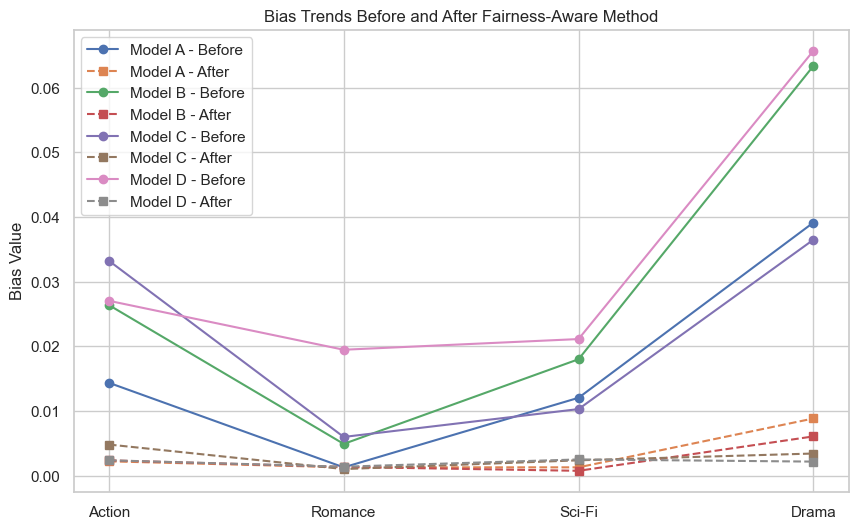

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["Model A", "Model B", "Model C", "Model D"]

# Bias values (before applying fairness)
bias_before_age = np.array([
   mf_before,  # Model A
    wmf_before,  # Model B
    vaecf_before,  # Model C
    neumf_before,  # Model D
])

# Bias values (after applying fairness)
bias_after_age = np.array([
    mf_after,  # Model A
   wmf_after,  # Model B
 vaecf_after,  # Model C
  neumf_after,  # Model D
])

# Calculate percentage reduction
percentage_reduction = ((bias_before_age - bias_after_age) / bias_before_age) * 100

# --- Plot 1: Percentage Reduction Bar Chart ---
# fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(categories))

# for i, model in enumerate(models):
#     ax1.bar(x + i * bar_width, percentage_reduction[i], width=bar_width, label=f"{model}")

# ax1.set_xticks(x + bar_width * (len(models) / 2))
# ax1.set_xticklabels(categories)
# ax1.set_ylabel("Bias Reduction (%)")
# ax1.set_title("Percentage Reduction in Bias Across Categories")
# ax1.legend()
# plt.show()

# --- Plot 2: Line Plot of Bias Trends ---
fig, ax2 = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    ax2.plot(categories, bias_before_age[i], marker="o", linestyle="-", label=f"{model} - Before")
    ax2.plot(categories, bias_after_age[i], marker="s", linestyle="--", label=f"{model} - After")

ax2.set_ylabel("Bias Value")
ax2.set_title("Bias Trends Before and After Fairness-Aware Method")
ax2.legend()
plt.show()
#age


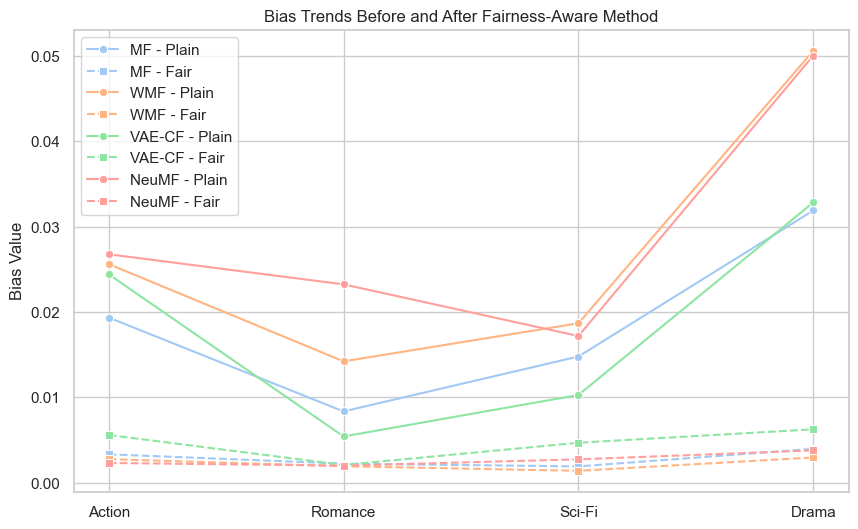

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["MF", "WMF", "VAE-CF", "NeuMF"]

# Bias values (before applying fairness)
bias_before_occ = np.array([
   [0.019344216990970733,
 0.008358959112723276,
 0.014786473597634254,
 0.0318801955556957],  # Model A
   [0.025601604165539277,
 0.014218965736360048,
 0.018675735358788262,
 0.05057248532638675],  # Model B
 [0.024408588279847182,
 0.005427995613159867,
 0.010283023578555428,
 0.03281925178619222],  # Model C
   [0.02675541278673631,
 0.023232542772268366,
 0.017187343953480996,
 0.05001548950958949],  # Model D
])

# Bias values (after applying fairness)
bias_after_occ = np.array([
    [0.0033406509705712637,
 0.0022420130619635993,
 0.0019235034856914415,
 0.0039779112817863015],  # Model A
    [0.0027687119757768257,
 0.001939334851539971,
 0.0014073143067405121,
 0.0029676274885210587],  # Model B
   [0.005597300247771501,
 0.0020899843321227837,
 0.004693409151664784,
 0.006263317412085773],  # Model C
   [0.0023253056253767952,
 0.0020116664130607094,
 0.0027485773594085132,
 0.0037929372050228504],  # Model D
])
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Get Seaborn color palette
palette = sns.color_palette("pastel", len(models))  # Get distinct colors for models

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    sns.lineplot(x=categories, y=bias_before_occ[i], marker="o", linestyle="-", color=palette[i], label=f"{model} - Plain", ax=ax)
    sns.lineplot(x=categories, y=bias_after_occ[i], marker="s", linestyle="--", color=palette[i], label=f"{model} - Fair", ax=ax)

ax.set_ylabel("Bias Value")
ax.set_title("Bias Trends Before and After Fairness-Aware Method")
ax.legend()
plt.show()


In [18]:
palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019)]

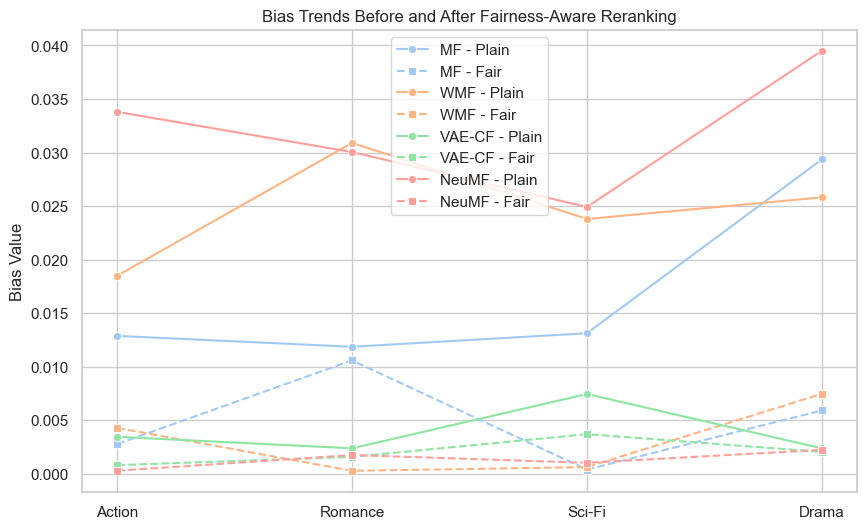

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["MF", "WMF", "VAE-CF", "NeuMF"]

# Bias values (before applying fairness)
bias_before_gender = np.array([
 [0.012863785468263077,
 0.011845402110327488,
 0.013110491498551202,
 0.029346832686384938],  # Model A
   [0.018484951615548625,
 0.030898524775390457,
 0.023785837297031327,
 0.025802325369489565],  # Model B
[0.003432562462413191,
 0.00235703351374994,
 0.0074310635467352,
 0.002357006177901716],  # Model C
 [0.03379556885900169,
 0.030044343301805984,
 0.024909049076959525,
 0.039503849798625895],  # Model D
])

# Bias values (after applying fairness)
bias_after_gender = np.array([
  [0.0027582827620141054,
 0.010573082390246569,
 0.0003701547209009892,
 0.005895877754086731],  # Model A
   [0.004260624533012597,
 0.00025552639731744875,
 0.0006021449528912232,
 0.0074438476117580366],  # Model B
   [0.0007875913472928375,
 0.0015551136260091442,
 0.003680648953037019,
 0.002022634082335578],  # Model C
   [0.0002617544147394957,
 0.0017281449893390283,
 0.0010022233156561505,
 0.002213647877826963],  # Model D
])
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Get Seaborn color palette
palette = sns.color_palette("pastel", len(models))  # Get distinct colors for models

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    sns.lineplot(x=categories, y=bias_before_gender[i], marker="o", linestyle="-", color=palette[i], label=f"{model} - Plain", ax=ax)
    sns.lineplot(x=categories, y=bias_after_gender[i], marker="s", linestyle="--", color=palette[i], label=f"{model} - Fair", ax=ax)

ax.set_ylabel("Bias Value")
ax.set_title("Bias Trends Before and After Fairness-Aware Reranking")
ax.legend()
plt.show()

#gender


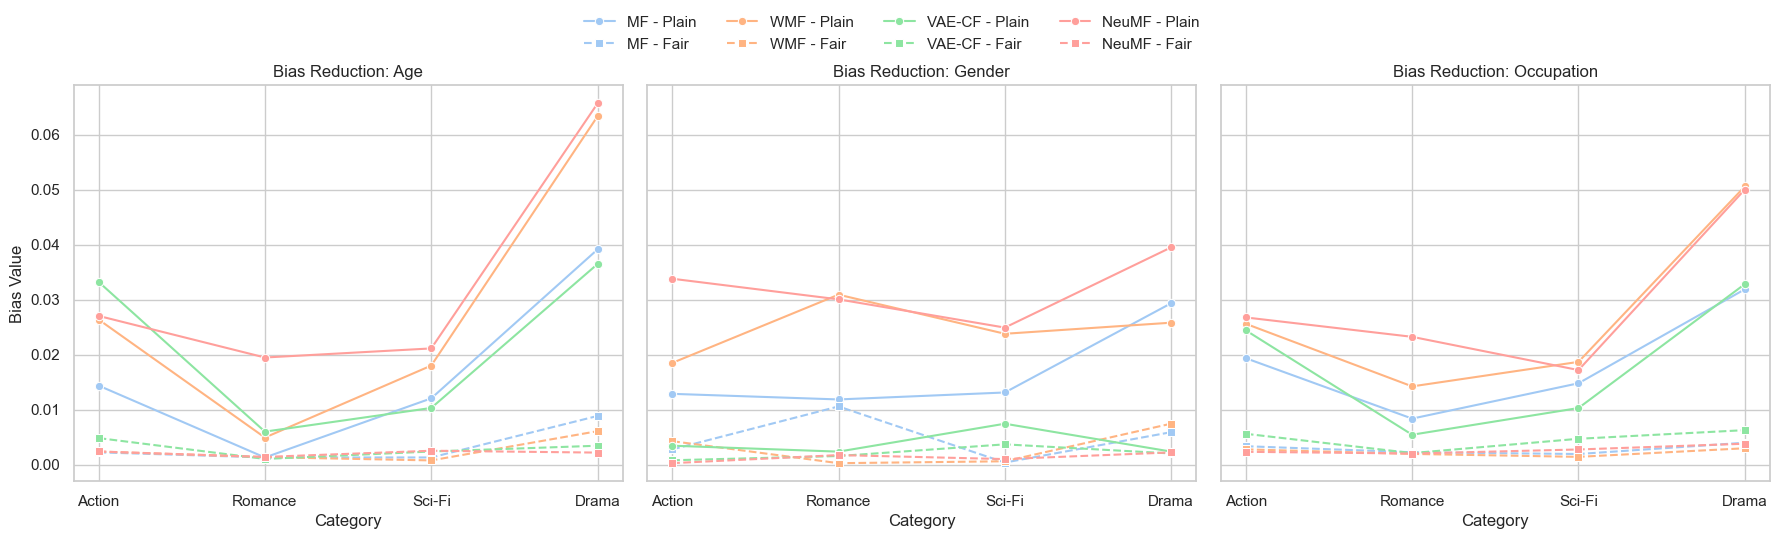

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["MF", "WMF", "VAE-CF", "NeuMF"]


# Set Seaborn style
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel", len(models))  # Pastel colors for consistency

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # sharey=True keeps the same scale

titles = ["Bias Reduction: Age", "Bias Reduction: Gender", "Bias Reduction: Occupation"]

for idx, ax in enumerate(axes):
    for i, model in enumerate(models):
        sns.lineplot(x=categories, y=bias_before[idx][i], marker="o", linestyle="-", color=palette[i], label=f"{model} - Plain", ax=ax)
        sns.lineplot(x=categories, y=bias_after[idx][i], marker="s", linestyle="--", color=palette[i], label=f"{model} - Fair", ax=ax)
    
    ax.set_title(titles[idx])  # Set title for each subplot
    ax.set_xlabel("Category")  # Label x-axis
    ax.set_ylabel("Bias Value" if idx == 0 else "")  # Label y-axis only for first plot
    ax.legend_.remove()

# Move legend outside
# axes[-1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
handles, labels = axes[0].get_legend_handles_labels()  # Get legend handles from first subplot
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.09), ncol=4, frameon=False)

plt.tight_layout()
plt.savefig("biasReduction.pdf", format="pdf",bbox_inches="tight")
plt.show()


In [34]:
bias_before = [bias_before_age, bias_before_gender, bias_before_occ]
bias_after = [bias_after_age, bias_after_gender, bias_after_occ]

In [29]:
bias_before

[array([[0.01934422, 0.00835896, 0.01478647, 0.0318802 ],
        [0.0256016 , 0.01421897, 0.01867574, 0.05057249],
        [0.02440859, 0.005428  , 0.01028302, 0.03281925],
        [0.02675541, 0.02323254, 0.01718734, 0.05001549]]),
 array([[0.01286379, 0.0118454 , 0.01311049, 0.02934683],
        [0.01848495, 0.03089852, 0.02378584, 0.02580233],
        [0.00343256, 0.00235703, 0.00743106, 0.00235701],
        [0.03379557, 0.03004434, 0.02490905, 0.03950385]]),
 array([[0.00334065, 0.00224201, 0.0019235 , 0.00397791],
        [0.00276871, 0.00193933, 0.00140731, 0.00296763],
        [0.0055973 , 0.00208998, 0.00469341, 0.00626332],
        [0.00232531, 0.00201167, 0.00274858, 0.00379294]])]

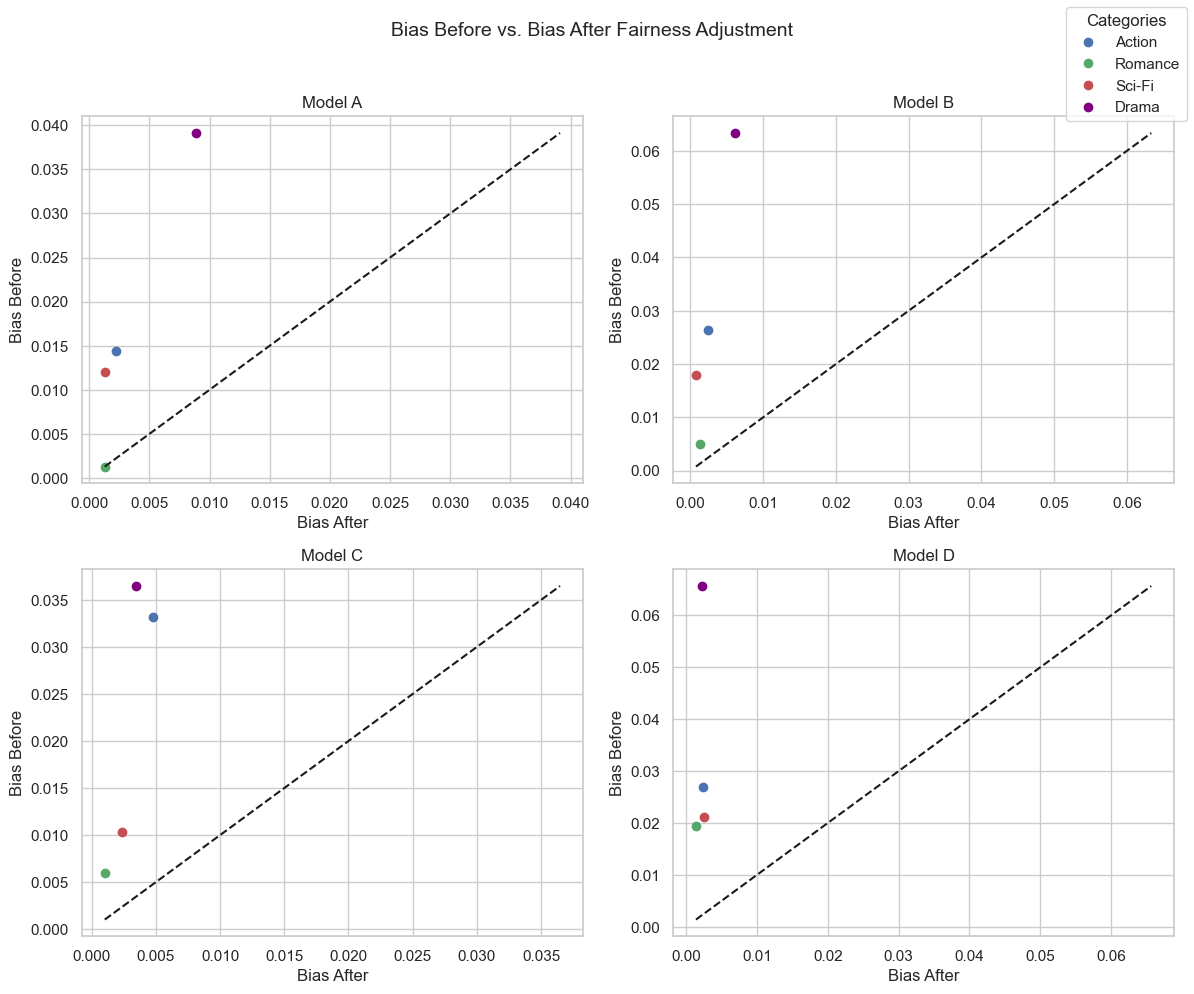

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories = ["Action", "Romance", "Sci-Fi", "Drama"]
models = ["Model A", "Model B", "Model C", "Model D"]
category_colors = ['b', 'g', 'r', 'purple']  # Assign colors to categories

# Bias values (before applying fairness)
bias_before_age = np.array([
    mf_before,      # Model A
    wmf_before,     # Model B
    vaecf_before,   # Model C
    neumf_before,   # Model D
])

# Bias values (after applying fairness)
bias_after_age = np.array([
    mf_after,      # Model A
    wmf_after,     # Model B
    vaecf_after,   # Model C
    neumf_after,   # Model D
])

# Create 4 scatter plots (one per model)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Bias Before vs. Bias After Fairness Adjustment", fontsize=14)

for i, ax in enumerate(axes.flatten()):
    for j, category in enumerate(categories):  
        ax.scatter(bias_after_age[i][j], bias_before_age[i][j], 
                   color=category_colors[j], label=category if i == 0 else "_nolegend_")  
        
    # Diagonal reference line (y = x)
    min_val = min(min(bias_before_age[i]), min(bias_after_age[i]))
    max_val = max(max(bias_before_age[i]), max(bias_after_age[i]))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="y = x (No Change)")
    
    ax.set_xlabel("Bias After")
    ax.set_ylabel("Bias Before")
    ax.set_title(f"{models[i]}")

# Create a shared legend for categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color, label=cat) 
           for cat, color in zip(categories, category_colors)]
fig.legend(handles=handles, loc="upper right", title="Categories")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title and legend
plt.show()


In [81]:
mf_before_gender = [1.28637855e-02, 4.92402912e-03, 1.18454021e-02, 3.98802690e-03,
        2.69903687e-03, 5.43003845e-04, 3.26535819e-04, 3.92269422e-05,
        1.57044448e-03, 9.36516593e-03, 1.01687214e-02, 1.31104915e-02,
        1.26838336e-05, 9.63611430e-03, 9.84398065e-03, 6.76769085e-03,
        2.96899204e-03, 2.93468327e-02]
mf_after_gender = [0.00275828, 0.00352289, 0.01057308, 0.00503886, 0.00057377,
       0.00094471, 0.00020473, 0.00076946, 0.01070636, 0.00873685,
       0.00115445, 0.00037015, 0.00125334, 0.00490704, 0.00387583,
       0.00053081, 0.00062058, 0.00589588]
mf_before_age = [0.01436679, 0.00589988, 0.0012906 , 0.00208632, 0.00150983,
        0.0066137 , 0.00048422, 0.0037047 , 0.00507518, 0.00797145,
        0.00805096, 0.01204422, 0.00200842, 0.0051448 , 0.0016264 ,
        0.00458065, 0.00384317, 0.03912723]
mf_after_age = [0.00222363, 0.00158095, 0.00130027, 0.00044784, 0.00155562,
       0.00046669, 0.00088801, 0.00053083, 0.00046997, 0.0029122 ,
       0.00095869, 0.00129484, 0.00251362, 0.00174099, 0.00040537,
       0.00107713, 0.00047103, 0.0088453 ]
mf_before_occ = [0.01934422, 0.01035326, 0.00835896, 0.00470912, 0.00268344,
        0.00597683, 0.00053417, 0.00623821, 0.00556398, 0.00962555,
        0.00902079, 0.01478647, 0.00519944, 0.00866751, 0.00483545,
        0.01260901, 0.00845561, 0.0318802 ]
mf_after_occ = [3.34065097e-03, 2.91423963e-03, 2.24201306e-03, 1.72520048e-03,
       1.04334711e-03, 1.96856419e-03, 6.47157392e-04, 1.26883559e-03,
       2.26757370e-05, 3.22349867e-03, 1.58053019e-03, 1.92350349e-03,
       2.11541449e-03, 2.44931698e-03, 4.73555681e-04, 1.70185465e-03,
       8.61357746e-04, 3.97791128e-03]
wmf_before_occ =[ 0.0256016 , 0.02528719, 0.01421897, 0.00417931, 0.00388609,
        0.01005699, 0.0009729 , 0.00449917, 0.00448891, 0.01470333,
        0.01118509, 0.01867574, 0.00881921, 0.00722801, 0.00450801,
        0.01058494, 0.0053705 , 0.05057249]
wmf_after_occ = [0.00276871, 0.00276656, 0.00193933, 0.00229813, 0.00289944,
       0.0017694 , 0.00078166, 0.00031538, 0.00022741, 0.0027504 ,
       0.00227059, 0.00140731, 0.00225788, 0.00155132, 0.00117125,
       0.00172987, 0.00125036, 0.00296763]
wmf_before_gender = [1.84849516e-02, 1.01519782e-02, 3.08985248e-02, 2.12276529e-03,
        8.29599256e-03, 5.94334190e-03, 6.12186321e-05, 3.53509467e-03,
        5.26351758e-04, 1.94554790e-02, 9.01497549e-03, 2.37858373e-02,
        1.16334992e-03, 1.31287746e-02, 7.44877262e-03, 7.68383358e-03,
        1.25224154e-03, 2.58023254e-02]
wmf_after_gender = [0.00426062, 0.00446804, 0.00025553, 0.00140158, 0.00160216,
       0.00095783, 0.00047551, 0.00057492, 0.00180417, 0.00619223,
       0.00283137, 0.00060214, 0.0007399 , 0.0020326 , 0.00092396,
       0.00215001, 0.00215826, 0.00744385]
wmf_before_age = [0.02637992, 0.01507466, 0.00491594, 0.00293377, 0.00495319,
        0.00735881, 0.00068349, 0.00325881, 0.00144309, 0.01037268,
        0.00871894, 0.01800288, 0.01024156, 0.00813444, 0.00252383,
        0.01279027, 0.0043627 , 0.06334013]
wmf_after_age = [0.00237222, 0.00185642, 0.00135403, 0.00122365, 0.00308978,
       0.00097381, 0.00082158, 0.00028558, 0.00094278, 0.00459585,
       0.00137405, 0.00075886, 0.00123706, 0.0003808 , 0.00060627,
       0.00108429, 0.00116406, 0.00607656]
vae_before_age = [0.00928553, 0.00906195, 0.00546026, 0.00162619, 0.00121308,
        0.004056  , 0.00045124, 0.00179293, 0.00156049, 0.00528671,
        0.00424639, 0.0068247 , 0.00319281, 0.00278854, 0.00158607,
        0.00401544, 0.0021126 , 0.01839768]
vae_after_age = [0.00482069, 0.00291273, 0.00102687, 0.00112276, 0.00172107,
       0.00393268, 0.001196  , 0.00179074, 0.        , 0.00177091,
       0.00311594, 0.00237985, 0.00182074, 0.00093428, 0.00150062,
       0.0018698 , 0.0008676 , 0.00342999]
vae_before_gender = [0.00343256, 0.0071116 , 0.00235703, 0.00010625, 0.00170081,
        0.0050048 , 0.00035689, 0.0007444 , 0.        , 0.00460946,
        0.00854352, 0.00743106, 0.00369164, 0.00259914, 0.0005497 ,
        0.00057268, 0.00040642, 0.00235701]
vae_after_gender = [0.00078759, 0.0082009 , 0.00155511, 0.00047027, 0.00122355,
       0.00447988, 0.00057458, 0.00023728, 0.        , 0.0023915 ,
       0.00510938, 0.00368065, 0.00241355, 0.00228462, 0.00048747,
       0.00010441, 0.00107259, 0.00202263]
vae_before_occ = [0.02440859, 0.01495308, 0.005428  , 0.00040164, 0.00276674,
        0.00950585, 0.00119777, 0.00292171, 0.        , 0.01207671,
        0.0153895 , 0.01028302, 0.006052  , 0.00568064, 0.00264922,
        0.00558284, 0.00208031, 0.03281925]
vae_after_occ = [0.0055973 , 0.00723801, 0.00208998, 0.00179839, 0.00124096,
       0.00464437, 0.00092489, 0.00181859, 0.        , 0.00311969,
       0.00471433, 0.00469341, 0.00280207, 0.00321757, 0.00154368,
       0.00219735, 0.00215995, 0.00626332]
neumf_before_occ = [0.01018651, 0.00748792, 0.0089618 , 0.00090784, 0.00189764,
        0.00300824, 0.0002687 , 0.00130824, 0.00071855, 0.00835186,
        0.00634023, 0.00661845, 0.00517305, 0.00465013, 0.00132897,
        0.00236291, 0.00124301, 0.01698788]
neumf_after_occ =[0.00232531, 0.0027381 , 0.00201167, 0.00226156, 0.0026621 ,
       0.00193431, 0.00050448, 0.00154969, 0.00018709, 0.00337277,
       0.00244223, 0.00274858, 0.00133107, 0.00147025, 0.00104158,
       0.00131099, 0.00206949, 0.00379294]
neumf_before_age =  [0.02703692, 0.02173366, 0.01947046, 0.00418319, 0.01159462,
        0.00449844, 0.00130756, 0.0038084 , 0.00112612, 0.01010491,
        0.01463503, 0.02112252, 0.01082809, 0.00621037, 0.00477355,
        0.0104789 , 0.00645371, 0.06567547]
neumf_after_age = [0.00090336, 0.00119161, 0.00117658, 0.00108398, 0.00158621,
       0.00219546, 0.00082725, 0.00047908, 0.00081272, 0.0040156 ,
       0.00189083, 0.00110872, 0.00205268, 0.00076001, 0.00043585,
       0.00169552, 0.00055924, 0.00670957]
neumf_before_gender = [0.01180912, 0.00538059, 0.01259929, 0.0004831 , 0.00195834,
        0.00088056, 0.00039637, 0.00050758, 0.00040014, 0.01293857,
        0.00702708, 0.00939632, 0.00056694, 0.00602407, 0.00130239,
        0.00044201, 0.00035466, 0.01248387]
neumf_after_gender = [0.00026175, 0.00343002, 0.00172814, 0.00053915, 0.00033878,
       0.00027886, 0.00019043, 0.00062191, 0.00035605, 0.00127284,
       0.00229518, 0.00100222, 0.00081307, 0.00483414, 0.00118475,
       0.00325964, 0.00071451, 0.00221365]

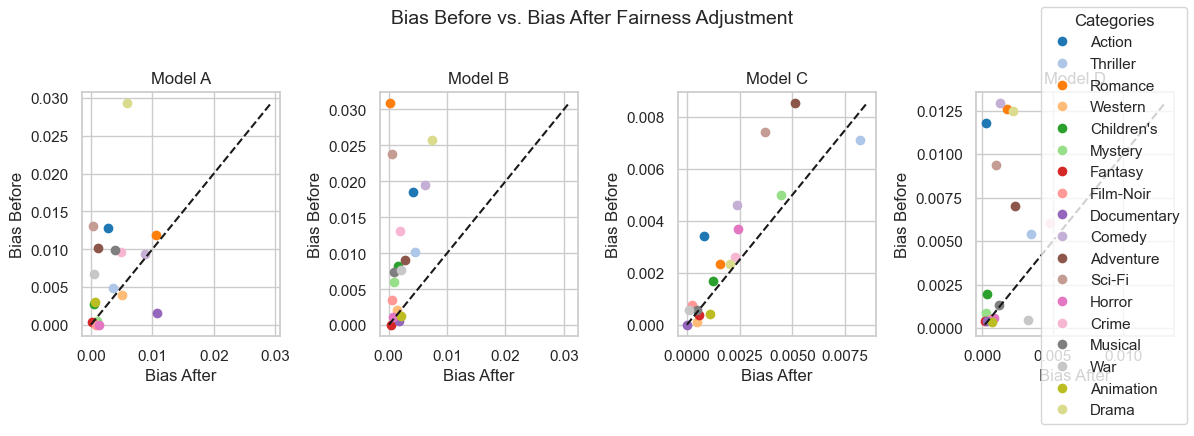

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories =['Action',
 'Thriller',
 'Romance',
 'Western',
 "Children's",
 'Mystery',
 'Fantasy',
 'Film-Noir',
 'Documentary',
 'Comedy',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Crime',
 'Musical',
 'War',
 'Animation',
 'Drama']
models = ["Model A", "Model B", "Model C", "Model D"]
cmap = plt.get_cmap("tab20")
category_colors = [cmap(i) for i in range(18)]
 # Assign colors to categories

# Bias values (before applying fairness)
bias_before_gender = np.array([
    mf_before_gender,      # Model A
    wmf_before_gender,     # Model B
    vae_before_gender,   # Model C
    neumf_before_gender,   # Model D
])

# Bias values (after applying fairness)
bias_after_gender = np.array([
    mf_after_gender,      # Model A
    wmf_after_gender,     # Model B
    vae_after_gender,   # Model C
    neumf_after_gender,   # Model D
])

# Create 4 scatter plots (one per model)
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

fig.suptitle("Bias Before vs. Bias After Fairness Adjustment", fontsize=14)

for i, ax in enumerate(axes.flatten()):
    for j, category in enumerate(categories):  
        ax.scatter(bias_after_gender[i][j], bias_before_gender[i][j], 
                   color=category_colors[j], label=category if i == 0 else "_nolegend_")  
        
    # Diagonal reference line (y = x)
    min_val = min(min(bias_before_gender[i]), min(bias_after_gender[i]))
    max_val = max(max(bias_before_gender[i]), max(bias_after_gender[i]))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="y = x (No Change)")
    
    ax.set_xlabel("Bias After")
    ax.set_ylabel("Bias Before")
    ax.set_title(f"{models[i]}")

# Create a shared legend for categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color, label=cat) 
           for cat, color in zip(categories, category_colors)]
fig.legend(handles=handles, loc="upper right", title="Categories")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title and legend
plt.show()


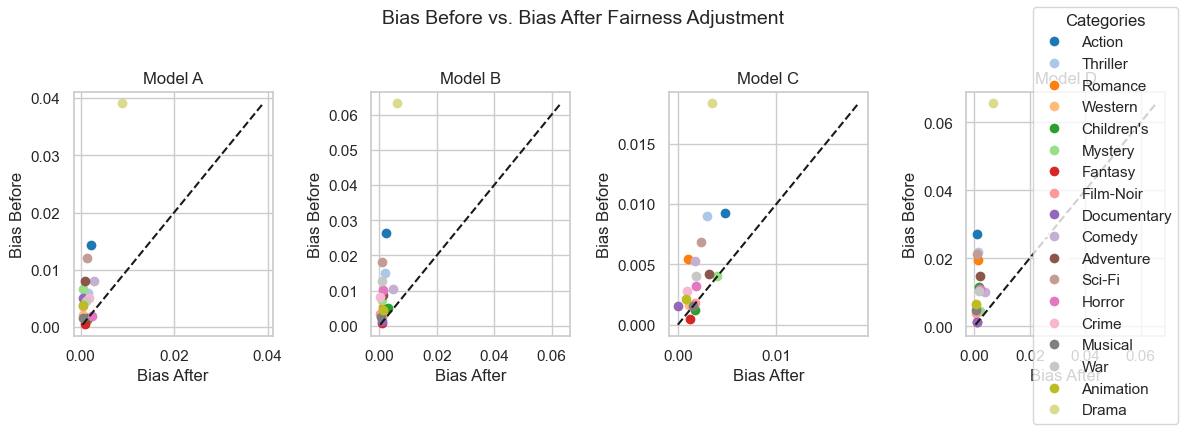

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories =['Action',
 'Thriller',
 'Romance',
 'Western',
 "Children's",
 'Mystery',
 'Fantasy',
 'Film-Noir',
 'Documentary',
 'Comedy',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Crime',
 'Musical',
 'War',
 'Animation',
 'Drama']
models = ["Model A", "Model B", "Model C", "Model D"]
cmap = plt.get_cmap("tab20")
category_colors = [cmap(i) for i in range(18)]
 # Assign colors to categories

# Bias values (before applying fairness)
bias_before_age = np.array([
      mf_before_age,    # Model A
    wmf_before_age,     # Model B
    vae_before_age,   # Model C
    neumf_before_age,   # Model D
])

# Bias values (after applying fairness)
bias_after_age = np.array([
    mf_after_age,      # Model A
    wmf_after_age,     # Model B
    vae_after_age,   # Model C
    neumf_after_age,   # Model D
])

# Create 4 scatter plots (one per model)
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle("Bias Before vs. Bias After Fairness Adjustment", fontsize=14)

for i, ax in enumerate(axes.flatten()):
    for j, category in enumerate(categories):  
        ax.scatter(bias_after_age[i][j], bias_before_age[i][j], 
                   color=category_colors[j], label=category if i == 0 else "_nolegend_")  
        
    # Diagonal reference line (y = x)
    min_val = min(min(bias_before_age[i]), min(bias_after_age[i]))
    max_val = max(max(bias_before_age[i]), max(bias_after_age[i]))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="y = x (No Change)")
    
    ax.set_xlabel("Bias After")
    ax.set_ylabel("Bias Before")
    ax.set_title(f"{models[i]}")

# Create a shared legend for categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color, label=cat) 
           for cat, color in zip(categories, category_colors)]
fig.legend(handles=handles, loc="upper right", title="Categories")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title and legend
plt.show()


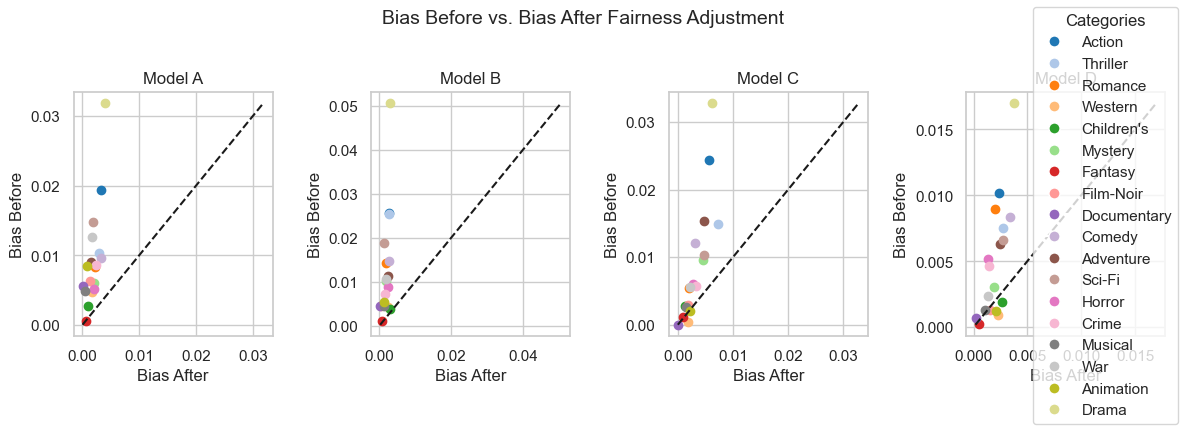

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories =['Action',
 'Thriller',
 'Romance',
 'Western',
 "Children's",
 'Mystery',
 'Fantasy',
 'Film-Noir',
 'Documentary',
 'Comedy',
 'Adventure',
 'Sci-Fi',
 'Horror',
 'Crime',
 'Musical',
 'War',
 'Animation',
 'Drama']
models = ["Model A", "Model B", "Model C", "Model D"]
cmap = plt.get_cmap("tab20")
category_colors = [cmap(i) for i in range(18)]
 # Assign colors to categories

# Bias values (before applying fairness)
bias_before_occ = np.array([
    mf_before_occ,      # Model A
    wmf_before_occ,     # Model B
    vae_before_occ,   # Model C
    neumf_before_occ,   # Model D
])

# Bias values (after applying fairness)
bias_after_occ = np.array([
    mf_after_occ,      # Model A
    wmf_after_occ,     # Model B
    vae_after_occ,   # Model C
    neumf_after_occ,   # Model D
])

# Create 4 scatter plots (one per model)
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

fig.suptitle("Bias Before vs. Bias After Fairness Adjustment", fontsize=14)

for i, ax in enumerate(axes.flatten()):
    for j, category in enumerate(categories):  
        ax.scatter(bias_after_occ[i][j], bias_before_occ[i][j], 
                   color=category_colors[j], label=category if i == 0 else "_nolegend_")  
        
    # Diagonal reference line (y = x)
    min_val = min(min(bias_before_occ[i]), min(bias_after_occ[i]))
    max_val = max(max(bias_before_occ[i]), max(bias_after_occ[i]))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="y = x (No Change)")
    
    ax.set_xlabel("Bias After")
    ax.set_ylabel("Bias Before")
    ax.set_title(f"{models[i]}")

# Create a shared legend for categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color, label=cat) 
           for cat, color in zip(categories, category_colors)]
fig.legend(handles=handles, loc="upper right", title="Categories")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title and legend
plt.show()


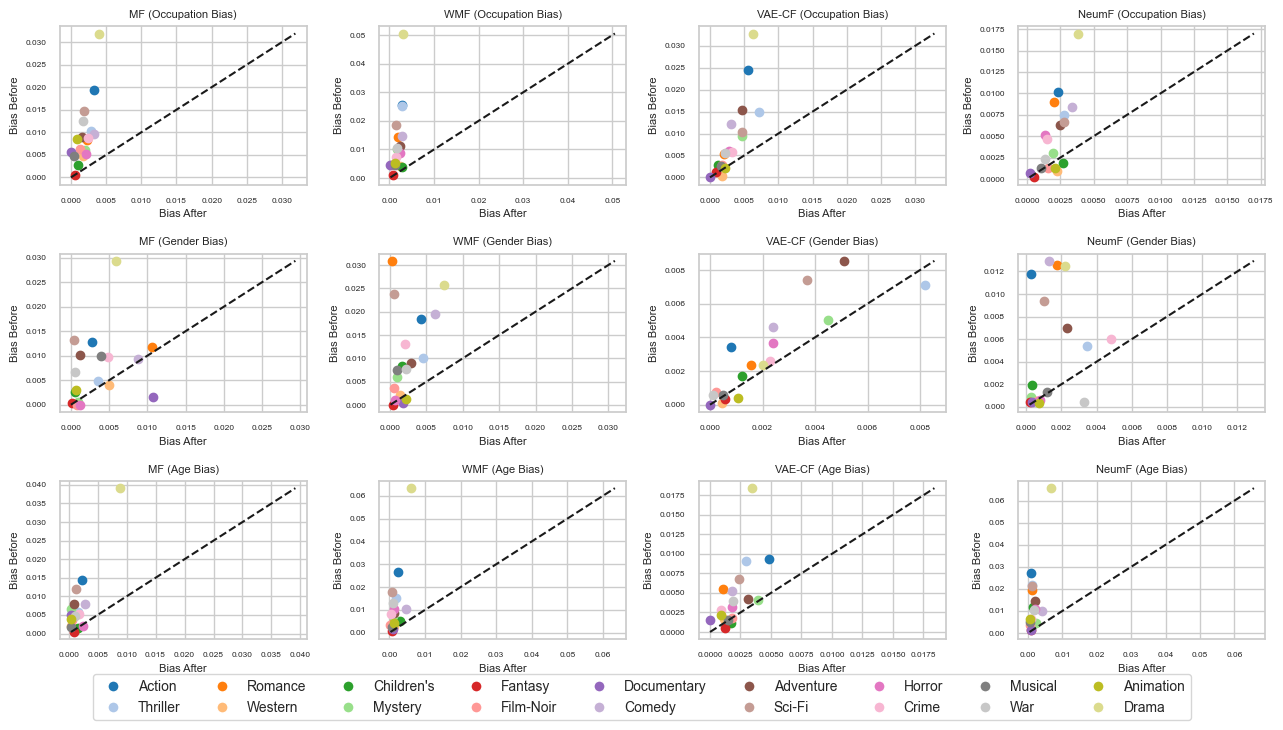

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Sample categories
categories = ['Action', 'Thriller', 'Romance', 'Western', "Children's", 'Mystery', 'Fantasy', 
              'Film-Noir', 'Documentary', 'Comedy', 'Adventure', 'Sci-Fi', 'Horror', 'Crime', 
              'Musical', 'War', 'Animation', 'Drama']

models = ["MF", "WMF", "VAE-CF", "NeumF"]

# Assign 18 distinct colors to categories
cmap = plt.get_cmap("tab20")
category_colors = [cmap(i) for i in range(18)]

# Bias values (before and after) for Occupation, Gender, and Age
bias_before_occ = np.array([mf_before_occ, wmf_before_occ, vae_before_occ, neumf_before_occ])
bias_after_occ = np.array([mf_after_occ, wmf_after_occ, vae_after_occ, neumf_after_occ])

bias_before_gen = np.array([mf_before_gender, wmf_before_gender, vae_before_gender, neumf_before_gender])
bias_after_gen = np.array([mf_after_gender, wmf_after_gender, vae_after_gender, neumf_after_gender])

bias_before_age = np.array([mf_before_age, wmf_before_age, vae_before_age, neumf_before_age])
bias_after_age = np.array([mf_after_age, wmf_after_age, vae_after_age, neumf_after_age])

# Create a 3-row, 4-column figure
fig, axes = plt.subplots(3, 4, figsize=(13, 7))

# Titles for rows
bias_types = ["Occupation Bias", "Gender Bias", "Age Bias"]

# fig.suptitle("Bias Before vs. Bias After Fairness Adjustment", fontsize=16, fontweight="bold")

# Loop through bias types and models to create scatter plots
for row, (bias_before, bias_after, bias_name) in enumerate(zip(
        [bias_before_occ, bias_before_gen, bias_before_age], 
        [bias_after_occ, bias_after_gen, bias_after_age], 
        bias_types)):
    
    for col, model in enumerate(models):
        ax = axes[row, col]
        
        # Scatter plot for categories
        for j, category in enumerate(categories):  
            ax.scatter(bias_after[col][j], bias_before[col][j], 
                       color=category_colors[j], label=category if row == 0 and col == 0 else "_nolegend_")
        
        # Diagonal reference line (y = x)
        min_val = min(min(bias_before[col]), min(bias_after[col]))
        max_val = max(max(bias_before[col]), max(bias_after[col]))
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', label="y = x (No Change)")

        ax.set_xlabel("Bias After", fontsize = 8)
        ax.set_ylabel("Bias Before",fontsize = 8)
        ax.tick_params(axis='both', labelsize=6)

        ax.set_title(f"{model} ({bias_name})", fontsize = 8)

# Create a single shared legend for all subplots
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=8, markerfacecolor=color, label=cat) 
           for cat, color in zip(categories, category_colors)]
fig.legend(handles=handles, loc="lower center", 
           bbox_to_anchor=(0.5, -0.05), ncol=9, fontsize=10)

# fig.legend(handles=handles, loc="center right", title="Categories", bbox_to_anchor=(0.4, 0.8))


plt.tight_layout()  # Adjust layout to fit legend and title
plt.savefig("biasbeforeafter.pdf", format="pdf",bbox_inches="tight")

plt.show()
